# Background/Introduction

Using data collected by buoys on oceanic wave patterns over a 30-month period, we will be looking at data dealing with wave height, energy, frequency, temperature, etc. during half hour intervals and attempting to find interactions between these columns, as well as plotting and predicting the wave pattern in the future given certain parameters base on the collected data. These are our main goals going into the research. To find interactions between data columns, if any exist (ex. Peak wave height and average wave height).Using the location and direction of the wave currents, being able to plot the patterns of the waves. Plot the patterns of ocean currents throughout a calendar year. Predict information about future wave patterns given a set of parameters such as time of year or ocean temperature. After analyzing what time and temperatures occur with the waves, it would be in our best interest if we could also investigate if they are related to the time and temperature that sharks often would attack. If there, is a relationship between shark attacks to wave occurrence we can see when it is safe to surf as well as should surfing not even be an option during certain times of the day / seasons. We know that shark attacks are not predictable so far because almost all beaches have shark nets for protection. So almost all shark attacks are random.

We plan to use our data to see if these attacks are more than random occurrences. We found two datasets from kaggle that would be very beneficial for our project. The first dataset has 24,000 rows and 6 columns. While the second dataset has 511 rows and 11 columns .I plan to collect more data as the project goes on because the more the better. For now, I have enough data to move forward in a positive direction. There is many data to work with so it should come out very clean and consistent. I haven’t recently change attributes of the waves dataset to make it easier to understand for anyone not familiar with wave terms. Any errors I did have in my data I either manually fixed or wrote a function that would clean it up. So far in my data I did not have any surprises. The majority of shark attacks occur near the shore and in the surf zone because their natural preys live in these areas. But attacks also take place in steep underwater drop-offs, where divers often swim. The wave height should not be a surprise where the attacks will take place.

# Data

I plan to compare years as well as months with my main columns such as significant wave height and sea sruface temperature ,to see any patterns that may be useful. I would like to study the waves specifically by month as I believe the colder months of the year such as november - march would have either a higher wave impact from the weather or even a lower impact from the weather.

In [31]:
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import numpy as n
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import plotly.plotly as py
#import plotly.tools as tls
import seaborn as sns
import random 

from math import sqrt  

import calendar
import datetime 

In [32]:
!sudo pip install --upgrade pip
!sudo pip install xlrd

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:380: SNIMissingWarning: An HTTPS request has been made, but the SNI (Server Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning,
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:139: InsecurePlatformWarning: A true SSLContext object is not available. This

In [33]:
%matplotlib inline   

In [34]:
#Loading in the datasets
print("Loading in the datasets")
Waves1 = pd.read_csv('Buoys-Waves.csv')
Control = pd.read_csv('control.csv')


Loading in the datasets


In [35]:
print("Renaming columns to much more appropriate names as well as getting rid of any bad and unseful data. Any unneccesary data could throw off data numbers as well as graph outputs")
Waves1 = Waves1.rename(columns = {'Date/Time' : 'time','Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
                       'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})
Waves1 = Waves1[Waves1['maximum_wave_height'] != -99.9]
Waves1 = Waves1[Waves1['peak_direction'] != -99.9]
Waves1 = Waves1[Waves1['sea_surface_temperature'] != -99.9]
Waves1.head() 

Renaming columns to much more appropriate names as well as getting rid of any bad and unseful data. Any unneccesary data could throw off data numbers as well as graph outputs


,time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature
2,1/1/2017 1:00,0.763,1.15,4.520,5.513,49.0,25.65
3,1/1/2017 1:30,0.770,1.41,4.582,5.647,75.0,25.50
4,1/1/2017 2:00,0.747,1.16,4.515,5.083,91.0,25.45
5,1/1/2017 2:30,0.718,1.61,4.614,6.181,68.0,25.45
6,1/1/2017 3:00,0.707,1.34,4.568,4.705,73.0,25.50


In [36]:
print("This code allows me to break up the time column because it was not useful to me, and make individual columns such as month,year,and time")
Waves1["time"] = pd.to_datetime(Waves1["time"])
Waves1["year"] = Waves1["time"].astype(str).str[0:4]
Waves1["year"] = Waves1["year"].astype(int)

Waves1["time1"] = Waves1["time"].astype(str).str[11:16]
Waves1["month"] = Waves1["time"].astype(str).str[5:7]
Waves1.head()

This code allows me to break up the time column because it was not useful to me, and make individual columns such as month,year,and time


,time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature,year,time1,month
2,2017-01-01 01:00:00,0.763,1.15,4.520,5.513,49.0,25.65,2017,01:00,01
3,2017-01-01 01:30:00,0.770,1.41,4.582,5.647,75.0,25.50,2017,01:30,01
4,2017-01-01 02:00:00,0.747,1.16,4.515,5.083,91.0,25.45,2017,02:00,01
5,2017-01-01 02:30:00,0.718,1.61,4.614,6.181,68.0,25.45,2017,02:30,01
6,2017-01-01 03:00:00,0.707,1.34,4.568,4.705,73.0,25.50,2017,03:00,01


In [37]:
list(Waves1)

['time',
 'significant_wave_height',
 'maximum_wave_height',
 'zero_wave_period',
 'peak_wave_period',
 'peak_direction',
 'sea_surface_temperature',
 'year',
 'time1',
 'month']

In [38]:
print("Checking the dataset for any null values")
Waves1.isnull().sum()

Checking the dataset for any null values


time                       0
significant_wave_height    0
maximum_wave_height        0
zero_wave_period           0
peak_wave_period           0
peak_direction             0
sea_surface_temperature    0
year                       0
time1                      0
month                      0
dtype: int64

This is the data that I will use to look at the relationships between waves and how I can improve the safety of being out in the ocean.

# Methodology

In [39]:
print("Getting the maximum values of all columns in the dataset")
a = Waves1[['significant_wave_height','maximum_wave_height','zero_wave_period','peak_wave_period','peak_direction','sea_surface_temperature','year','month']].max()
#a = Waves1[['maximum_wave_height']].max()
#b = Waves1[['significant_wave_height']].max()
print(a) 
print("month = 12 would be December")

Getting the maximum values of all columns in the dataset
significant_wave_height       4.257
maximum_wave_height           7.906
zero_wave_period             10.921
peak_wave_period             21.121
peak_direction              358.000
sea_surface_temperature      28.650
year                       2019.000
month                        12.000
dtype: float64
month = 12 would be December


In [40]:
print("Getting the minimum values of all columns in the dataset")
b = Waves1[['significant_wave_height','maximum_wave_height','zero_wave_period','peak_wave_period','peak_direction','sea_surface_temperature','year','month']].min()
#a = Waves1[['maximum_wave_height']].max()
#b = Waves1[['significant_wave_height']].max()
print(b) 
print("month = 1 would be January")

Getting the minimum values of all columns in the dataset
significant_wave_height       0.294
maximum_wave_height           0.510
zero_wave_period              3.076
peak_wave_period              2.720
peak_direction                5.000
sea_surface_temperature      19.800
year                       2017.000
month                         1.000
dtype: float64
month = 1 would be January


In [41]:
print("Getting the mean values of all columns in the dataset")
c = Waves1[['significant_wave_height','maximum_wave_height','zero_wave_period','peak_wave_period','peak_direction','sea_surface_temperature','year','month']].mean()
#a = Waves1[['maximum_wave_height']].max()
#b = Waves1[['significant_wave_height']].max()
print(c)

Getting the mean values of all columns in the dataset
significant_wave_height       1.237799
maximum_wave_height           2.090125
zero_wave_period              5.619685
peak_wave_period              9.011972
peak_direction               98.626594
sea_surface_temperature      23.949641
year                       2017.800110
month                              inf
dtype: float64


In [42]:
#y=Waves1[['year','peak_direction']]
#y
#twenty=y.loc[ y['peak_direction'] >80 & y.loc[y['year'] == 2017]
#twenty192=y.loc[ y['year'] == 2017]
#twenty.head()
#twenty192.head()

In [43]:
#y=Waves1[['year','peak_direction']]
#y
#twenty19=y.loc[ y['peak_direction'] >80]
#twenty192=y.loc[ y['year'] ==2018]
#twenty19.head()
#twenty192.head()

In [44]:
#y=Waves1[['year','peak_direction']]
#y
#twenty19=y.loc[ y['peak_direction'] >40]
#twenty192=y.loc[ y['year'] ==2019]
#twenty19.head()
#twenty192.head()

In [45]:
y=Waves1[['month','sea_surface_temperature','year']]
y
ssp=y.loc[ y['sea_surface_temperature'] >28]
ssp.head()

,month,sea_surface_temperature,year
1659,02,28.15,2017
1660,02,28.10,2017
1701,02,28.05,2017
1702,02,28.45,2017
1703,02,28.50,2017


In [46]:
y=Waves1[['month','sea_surface_temperature','year']]
y
ssp=y.loc[ y['sea_surface_temperature'] >27]
ssp.head()

,month,sea_surface_temperature,year
599,01,27.05,2017
600,01,27.10,2017
601,01,27.15,2017
602,01,27.15,2017
603,01,27.15,2017


Bar graph shows average wave height for the years 2017-2019 over each month 


/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


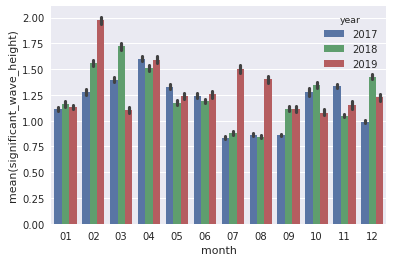

In [47]:
print("Bar graph shows average wave height for the years 2017-2019 over each month ")
sns.barplot(Waves1['month'], Waves1['significant_wave_height'],Waves1['year'] )
plt.show()

Bar graph shows average maximum height for the years 2017-2019 over each month 


/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


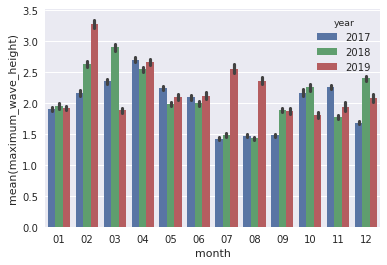

In [48]:
print("Bar graph shows average maximum height for the years 2017-2019 over each month ")
sns.barplot(Waves1['month'], Waves1['maximum_wave_height'],Waves1['year'] )
plt.show()

Bar graph shows average sea surface temperature for the years 2017-2019 over each month 


/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


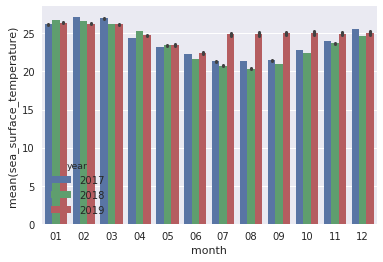

In [49]:
print("Bar graph shows average sea surface temperature for the years 2017-2019 over each month ")
sns.barplot(Waves1['month'], Waves1['sea_surface_temperature'],Waves1['year'] )
plt.show()

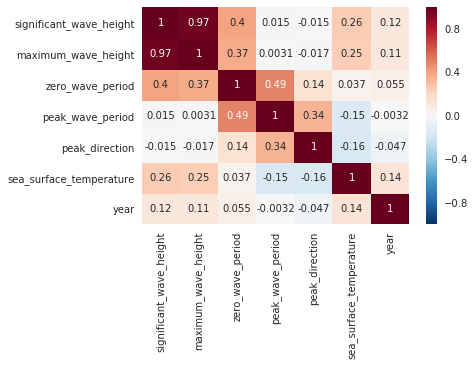

In [50]:
sns.heatmap(Waves1.corr(), annot=True)  

Shows the average wave height from 2017-2019 throughout all 12 months of the year
AxesSubplot(0.125,0.125;0.775x0.755)


month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,1.112290,1.276721,1.399726,1.599378,1.329685,1.242991,0.836591,0.866212,0.863192,1.282619,1.335367,0.991186
2018,1.163499,1.562165,1.722408,1.513461,1.175983,1.190878,0.876109,0.842743,1.116912,1.344783,1.046813,1.426449
2019,1.133142,1.973201,1.105864,1.593763,1.239791,1.256988,1.505330,1.400917,1.109806,1.079667,1.151177,1.231104


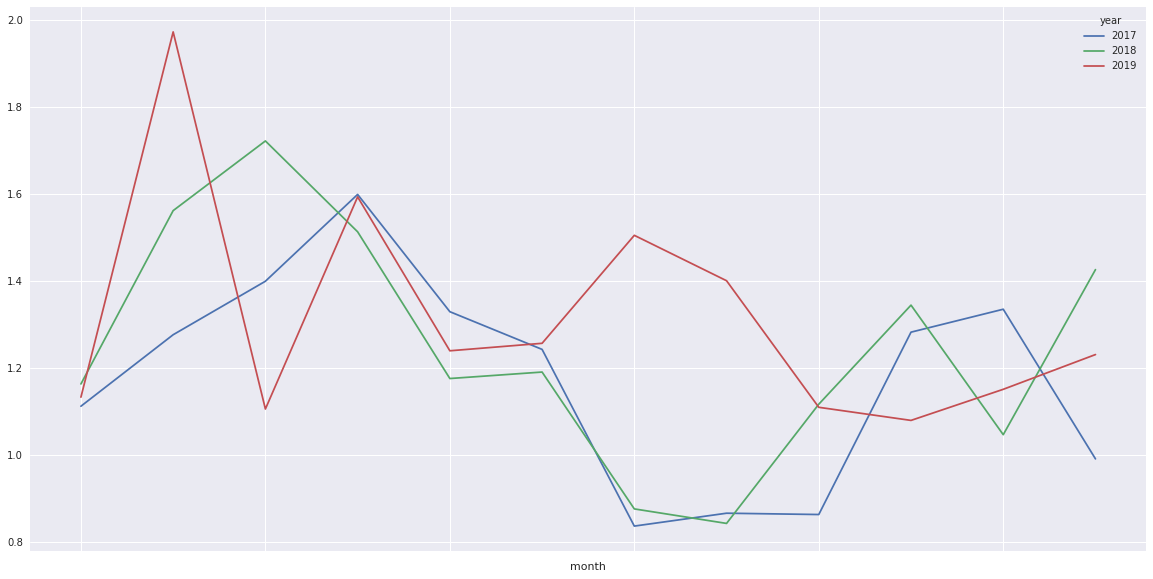

In [51]:
print("Shows the average wave height from 2017-2019 throughout all 12 months of the year")
print(Waves1.pivot_table('significant_wave_height', index="month",columns = 'year').plot(figsize=(20,10)))
Waves1[Waves1.significant_wave_height >0].pivot_table('significant_wave_height', index='year',columns = "month")


Shows the average sea temperature by year from 2017-2019 throughout all 12 months of the year
AxesSubplot(0.125,0.125;0.775x0.755)


month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,26.194609,27.177527,26.961160,24.399408,23.186741,22.286822,21.326078,21.379568,21.470537,22.859535,23.966900,25.586186
2018,26.742881,26.589829,26.265172,25.342708,23.418316,21.630694,20.764166,20.390108,20.994019,22.426236,23.690985,24.635714
2019,26.382846,26.273535,26.175881,24.770826,23.477982,22.463581,24.888368,24.911285,24.998958,25.065972,24.986111,25.032986


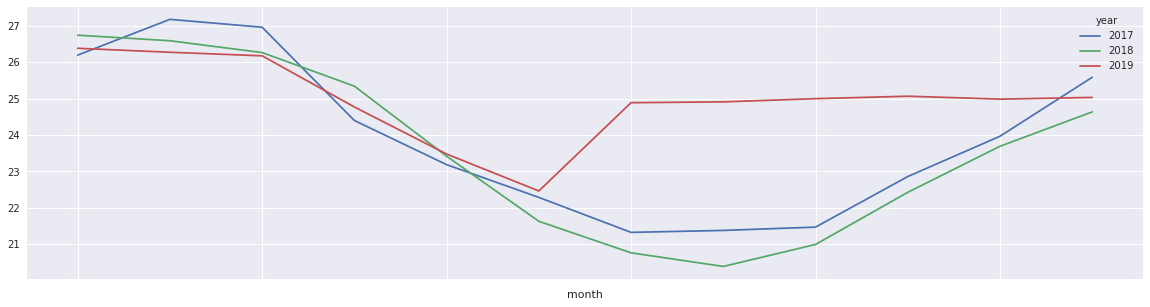

In [52]:
print("Shows the average sea temperature by year from 2017-2019 throughout all 12 months of the year") 
print(Waves1.pivot_table('sea_surface_temperature', index="month",columns = 'year').plot(figsize=(20,5)))
Waves1[Waves1.sea_surface_temperature >0].pivot_table('sea_surface_temperature', index='year',columns = "month") 

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


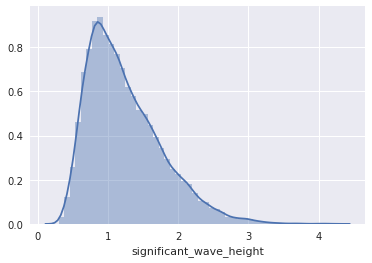

In [53]:
sns.distplot( Waves1["significant_wave_height"] )

In [54]:
#Waves1.month

So far my only machine learning alrogithm is a regression plot but I plan on using a k-means clusterin algorithm once I figure how to import the sklearn package


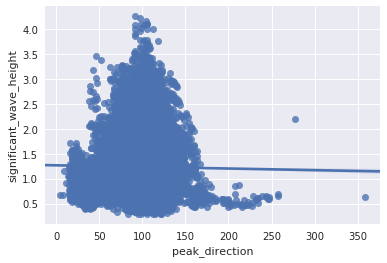

In [55]:
print("So far my only machine learning alrogithm is a regression plot but I plan on using a k-means clusterin algorithm once I figure how to import the sklearn package")
sns.regplot(x=Waves1["peak_direction"],y=Waves1["significant_wave_height"])

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution plot of the overall peak direction


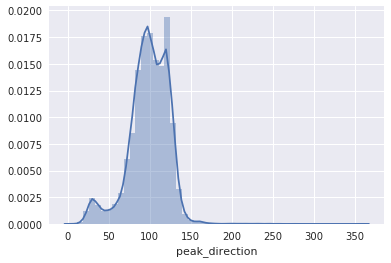

In [56]:
sns.distplot( Waves1["peak_direction"] )
print("Distribution plot of the overall peak direction")

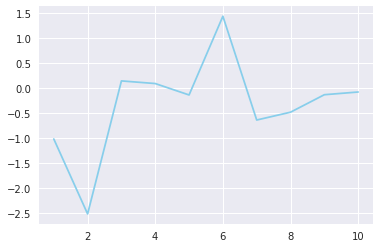

In [57]:
Waves1=pd.DataFrame({'sea_surface_temperature': range(1,11), 'maximum_wave_height': np.random.randn(10) })
plt.plot( 'sea_surface_temperature', 'maximum_wave_height', data=Waves1, color='skyblue')
plt.show()
#Displays a relationship of the max wave height in comparison to the approximate sea surface temperature.

This graph shows a percentage portion of each attribut


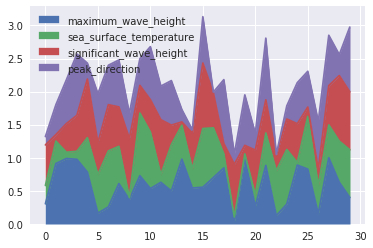

In [58]:
Waves1 = pd.DataFrame(np.random.rand(30, 4), columns=['maximum_wave_height', 'sea_surface_temperature', 'significant_wave_height',
'peak_direction'])
 
# plot
Waves1.plot.area()
print("This graph shows a percentage portion of each attribut")